# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import sqlite3

In [3]:
import os
from sklearn import tree
import scipy
from scipy import stats
from scipy.stats import pearsonr

In [4]:

from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
import requests
import warnings

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# DATASET UPLOAD AND INFORMATION

In [11]:
creditt = pd.read_csv(r"C:\Users\shedu\Deskop\credit.csv")


In [14]:
creditt.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**DATASET DESCRIPTION**



This dataset contains  records of 30000 customers.
29999 instances will be used to train and tes the model in the ratio of 80% for training and 20% for testing
1 instance will be used test the trained model performance on tkinker interface

Below are the description of all features in the dataset

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [15]:
creditt.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,29999.0,15000.000000,8660.109699,1.0,7500.5,15000.0,22499.5,29999.0
LIMIT_BAL,29999.0,167485.238841,129749.727113,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29999.0,1.603753,0.489125,1.0,1.0,2.0,2.0,2.0
EDUCATION,29999.0,1.853128,0.790361,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29999.0,1.551885,0.521969,0.0,1.0,2.0,2.0,3.0
AGE,29999.0,35.485316,9.218003,21.0,28.0,34.0,41.0,79.0
PAY_0,29999.0,-0.016701,1.123820,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29999.0,-0.133771,1.197206,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29999.0,-0.166206,1.196887,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29999.0,-0.220674,1.169157,-2.0,-1.0,0.0,0.0,8.0


In [16]:
creditt.shape

(29999, 25)

In [17]:
creditt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               29999 non-null  int64
 1   LIMIT_BAL        29999 non-null  int64
 2   SEX              29999 non-null  int64
 3   EDUCATION        29999 non-null  int64
 4   MARRIAGE         29999 non-null  int64
 5   AGE              29999 non-null  int64
 6   PAY_0            29999 non-null  int64
 7   PAY_2            29999 non-null  int64
 8   PAY_3            29999 non-null  int64
 9   PAY_4            29999 non-null  int64
 10  PAY_5            29999 non-null  int64
 11  PAY_6            29999 non-null  int64
 12  BILL_AMT1        29999 non-null  int64
 13  BILL_AMT2        29999 non-null  int64
 14  BILL_AMT3        29999 non-null  int64
 15  BILL_AMT4        29999 non-null  int64
 16  BILL_AMT5        29999 non-null  int64
 17  BILL_AMT6        29999 non-null  int64
 18  PAY_AM

In [18]:

creditt.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT'],
      dtype='object')

In [19]:
#check for duplicate
len(creditt[creditt.duplicated()])

0

In [20]:

# Taking the sum of null values in columns from a dataset to check for missing value
creditt.isnull().sum()

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
DEFAULT_PAYMENT    0
dtype: int64

In [21]:
creditt.dtypes

ID                 int64
LIMIT_BAL          int64
SEX                int64
EDUCATION          int64
MARRIAGE           int64
AGE                int64
PAY_0              int64
PAY_2              int64
PAY_3              int64
PAY_4              int64
PAY_5              int64
PAY_6              int64
BILL_AMT1          int64
BILL_AMT2          int64
BILL_AMT3          int64
BILL_AMT4          int64
BILL_AMT5          int64
BILL_AMT6          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
DEFAULT_PAYMENT    int64
dtype: object

## DATA ANALYSIS

In [22]:
#Renaming of columns
creditt.rename(columns={'default payment next month':'DEFAULT_PAYMENT'}, inplace=True)
#Replacing values with their labels
creditt.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
creditt.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
creditt.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
creditt.replace({'DEFAULT_PAYMENT' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

**TARGET VARIABLE - DEFAULT_PAYMENT**

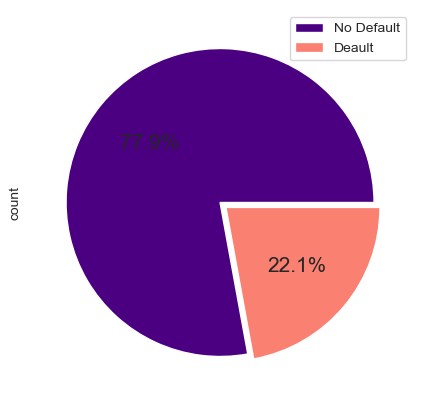

In [23]:
plt.figure(figsize=(7,5))
creditt['DEFAULT_PAYMENT'].value_counts().plot(kind='pie',labels=['',''],autopct='%1.1f%%',colors=['indigo','salmon'],explode=[0,0.05], textprops={'fontsize':15})

plt.legend(labels=['No Default','Deault'])
plt.show()

An imbalanced dataset- 22% of clients will default next month.. Need to balance dataset before training any model on the data.

**CATEGORICAL VARIABLES**

In [24]:
Demographics = ['SEX','EDUCATION','MARRIAGE']

SEX

In [25]:
creditt['SEX'].value_counts()

SEX
Female    18112
Male      11887
Name: count, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

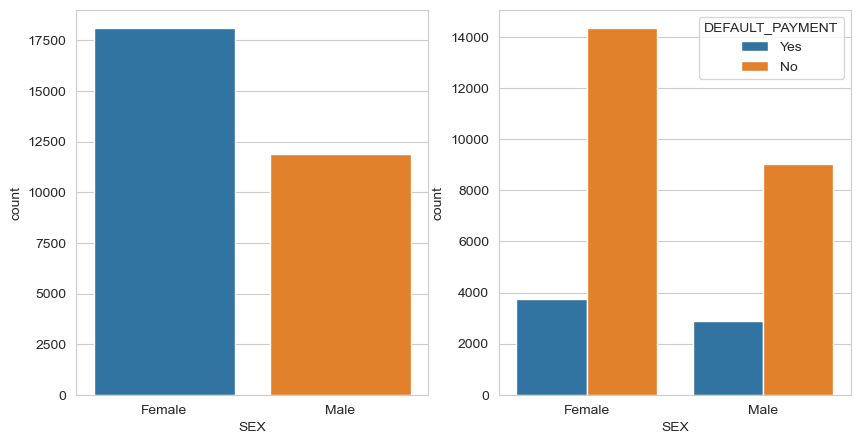

In [26]:
#count plot for Sex in relation to DEFAULT_PAYMENT
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = creditt)
sns.countplot(x = 'SEX', hue = 'DEFAULT_PAYMENT',ax = axes[1], data = creditt)




*  There are more females credit card holders than male credit card holder in the dataset




In [27]:
creditt['DEFAULT_PAYMENT'].groupby(creditt['SEX']).value_counts(normalize = True)

SEX     DEFAULT_PAYMENT
Female  No                 0.792237
        Yes                0.207763
Male    No                 0.758307
        Yes                0.241693
Name: proportion, dtype: float64



*   from the above, men have a  higher probability of defaulting






EDUCATION

In [28]:
creditt['EDUCATION'].value_counts()

EDUCATION
University         14029
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: count, dtype: int64

In [29]:
fil = (creditt['EDUCATION'] == 0) | (creditt['EDUCATION'] == 5) | (creditt['EDUCATION'] == 6) | (creditt['EDUCATION'] == 4)
creditt.loc[fil, 'EDUCATION'] = 'Others'

In [30]:
creditt['EDUCATION'].value_counts()

EDUCATION
University         14029
Graduate School    10585
High School         4917
Others               468
Name: count, dtype: int64

In [31]:
creditt['DEFAULT_PAYMENT'].groupby(creditt['EDUCATION']).value_counts(normalize = True)

EDUCATION        DEFAULT_PAYMENT
Graduate School  No                 0.807652
                 Yes                0.192348
High School      No                 0.748424
                 Yes                0.251576
Others           No                 0.929487
                 Yes                0.070513
University       No                 0.762635
                 Yes                0.237365
Name: proportion, dtype: float64

<Axes: xlabel='EDUCATION', ylabel='count'>

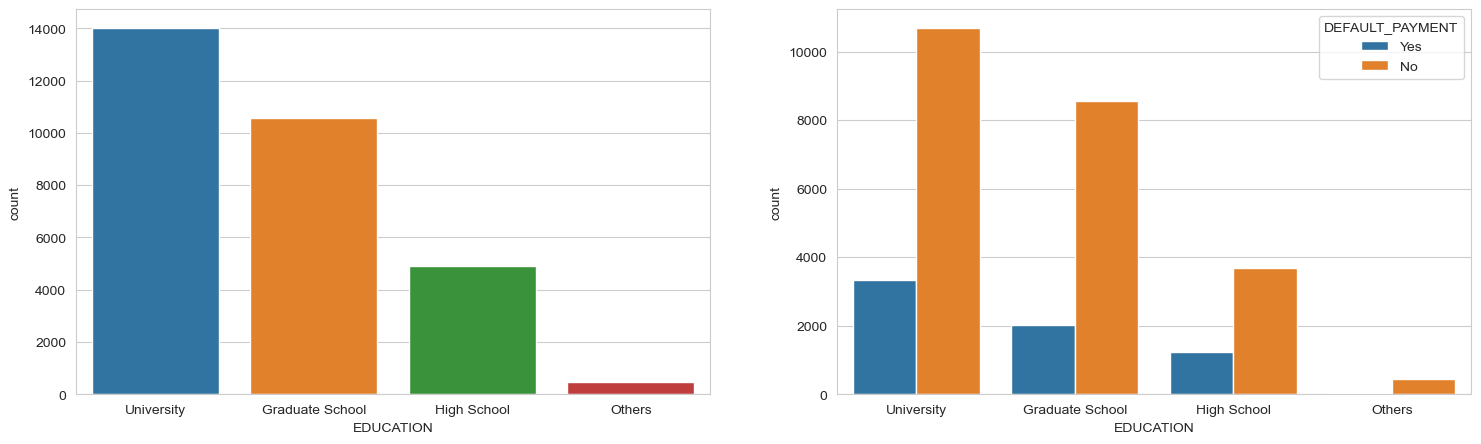

In [32]:

#count plot for EDUCATION in relation to DEFAULT_PAYMENT
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = creditt)
sns.countplot(x = 'EDUCATION', hue = 'DEFAULT_PAYMENT',ax = axes[1], data = creditt)


*   The use of credit card is the highest among graduates
*   The percentage of defaulting in credit card payment is highest and prominent among credit card users who are still in high school followed by customers in the university



MARRIAGE

In [33]:

#Value counts for marriage
fil = creditt['MARRIAGE']==0
creditt.loc[fil,'MARRIAGE'] = 'Others'
creditt['MARRIAGE'].value_counts()

MARRIAGE
Single     15964
Married    13658
Others       377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

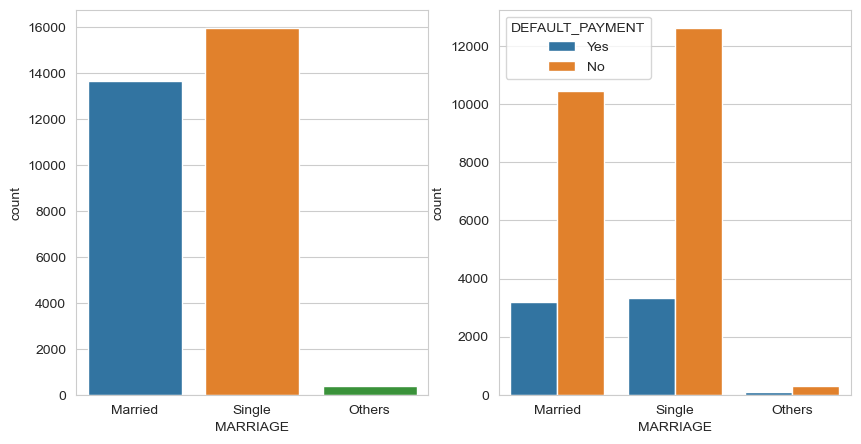

In [34]:
#count plot for MARRIAGE in relation to DEFAULT_PAYMENT
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = creditt)
sns.countplot(x = 'MARRIAGE', hue = 'DEFAULT_PAYMENT',ax = axes[1], data = creditt)



*   Majority of the credit card holders are single and they also have the highest number of defaulters.



**COMPARING DEMOGRAPHICS WITH TARGET VARIABLE**

In [35]:
creditt.groupby(by=['MARRIAGE', 'SEX'])['DEFAULT_PAYMENT'].value_counts(normalize = True)


MARRIAGE  SEX     DEFAULT_PAYMENT
Married   Female  No                 0.780375
                  Yes                0.219625
          Male    No                 0.740605
                  Yes                0.259395
Others    Female  No                 0.797414
                  Yes                0.202586
          Male    No                 0.710345
                  Yes                0.289655
Single    Female  No                 0.802784
                  Yes                0.197216
          Male    No                 0.773386
                  Yes                0.226614
Name: proportion, dtype: float64

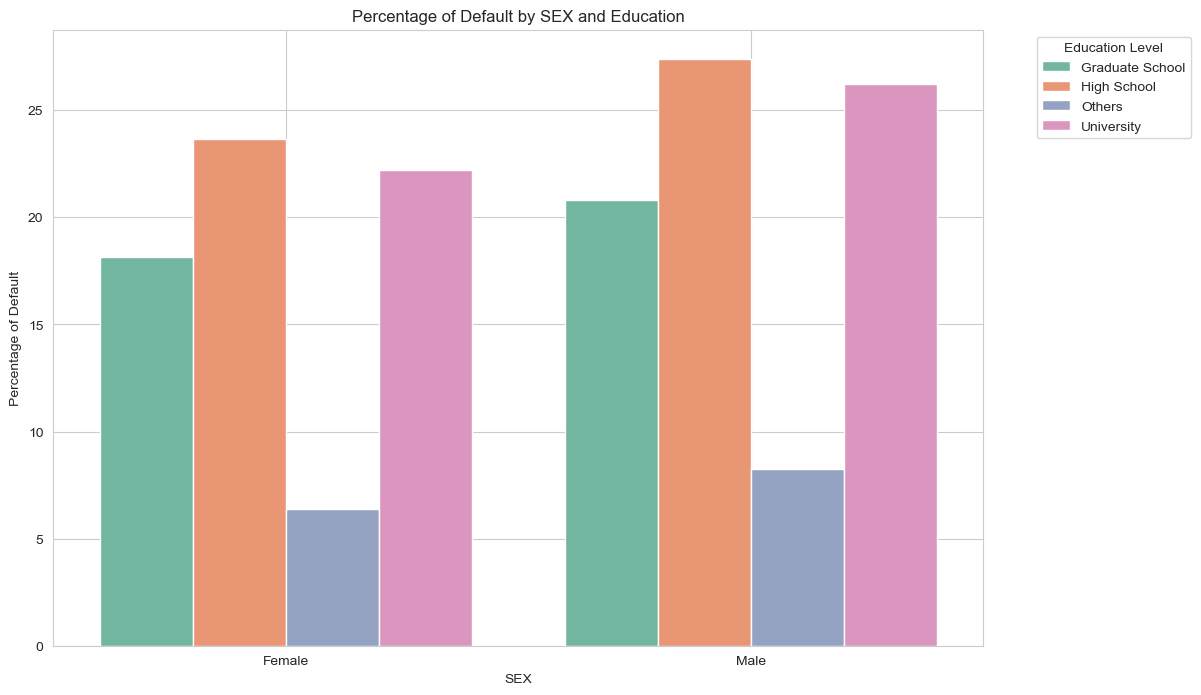

In [36]:
# Calculate the percentage of defaults
grouped = creditt.groupby(['SEX', 'EDUCATION', 'DEFAULT_PAYMENT']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped['Default_Percent'] = grouped['Yes'] / grouped['Total'] * 100
grouped = grouped.reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn
sns.barplot(data=grouped, x='SEX', y='Default_Percent', hue='EDUCATION', palette='Set2')

# Add labels and title
plt.title('Percentage of Default by SEX and Education')
plt.xlabel('SEX')
plt.ylabel('Percentage of Default')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



*   In all proportion, the percent of default is higher in men than women




**DISTRIBUTION OF DISCRETE VARIABLE- AGE**

AGE

In [37]:
creditt['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     823
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

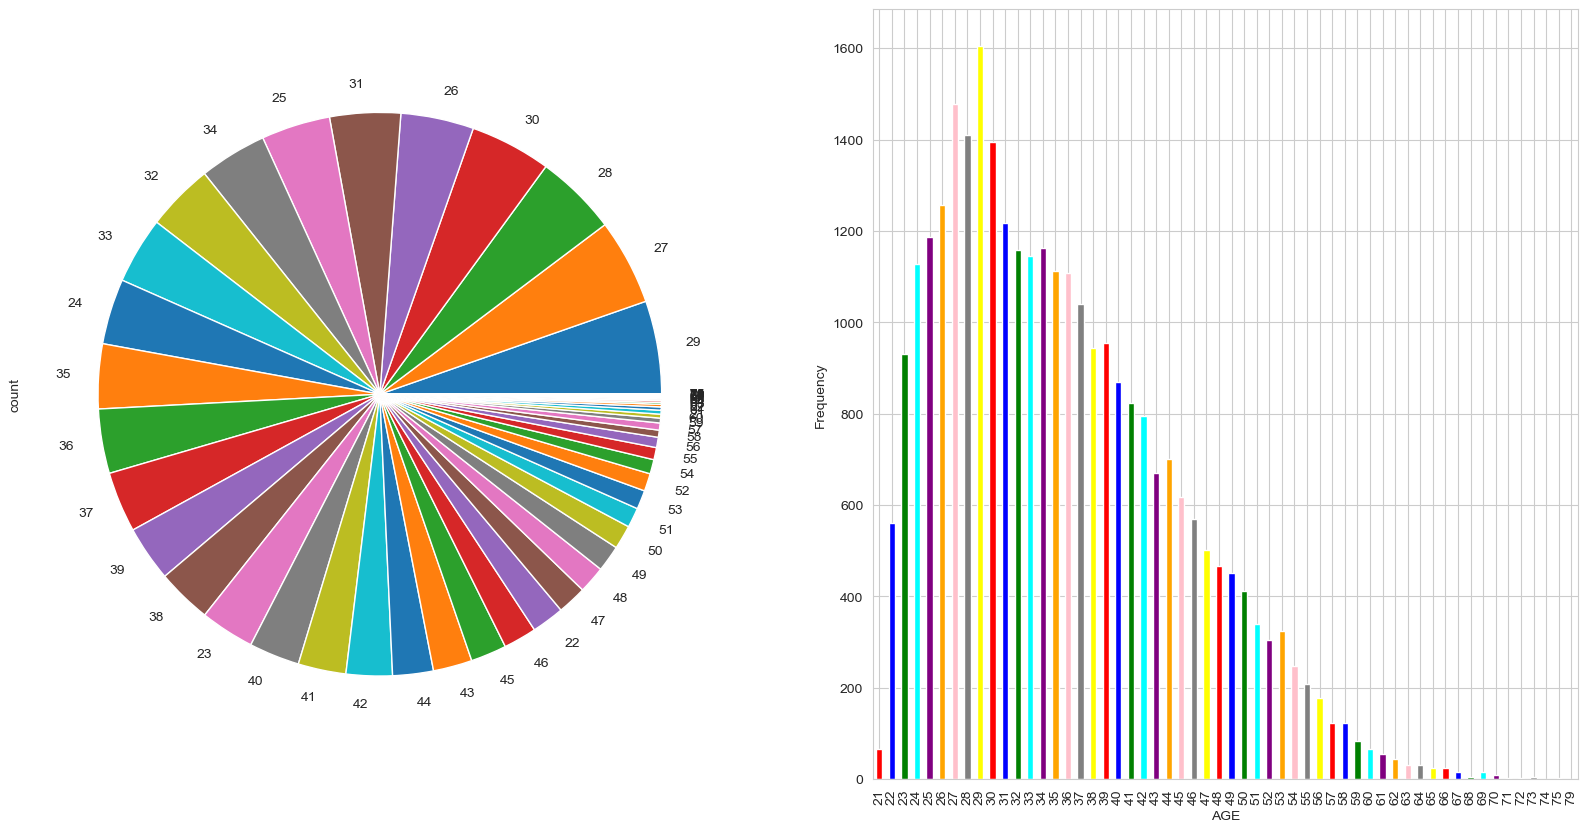

In [38]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Age_counts=creditt['AGE'].value_counts().sort_index()
creditt['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
colors=['red','blue','green','cyan','purple','orange','pink','grey','yellow']
Age_counts.plot(kind='bar',color=colors,ax = axes[1])
#plt.hist(creditt['AGE'].dropna(),bins=10,edgecolor='black')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

The distribution is right-skewed meaning the younger customers are more likely to use credit cards

<Axes: xlabel='AGE', ylabel='count'>

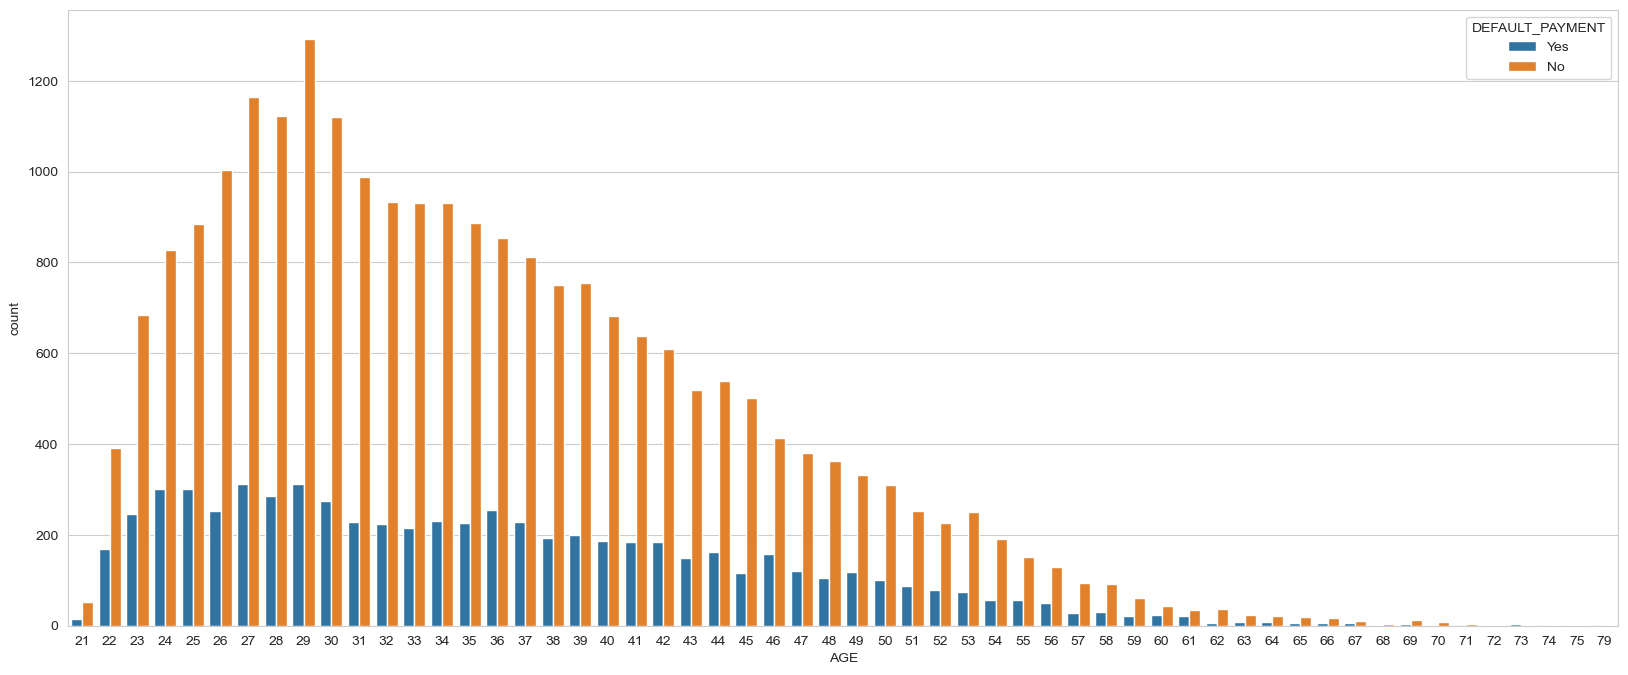

In [39]:
#values count for Age with respect to DEFAULT_PAYMENT
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'DEFAULT_PAYMENT', data = creditt)



1. The main clients are in their 30s  
2. Customers in their 30s have the highest non-default in the dataset





In [40]:
creditt.groupby('DEFAULT_PAYMENT')['AGE'].mean()

DEFAULT_PAYMENT
No     35.417027
Yes    35.725738
Name: AGE, dtype: float64

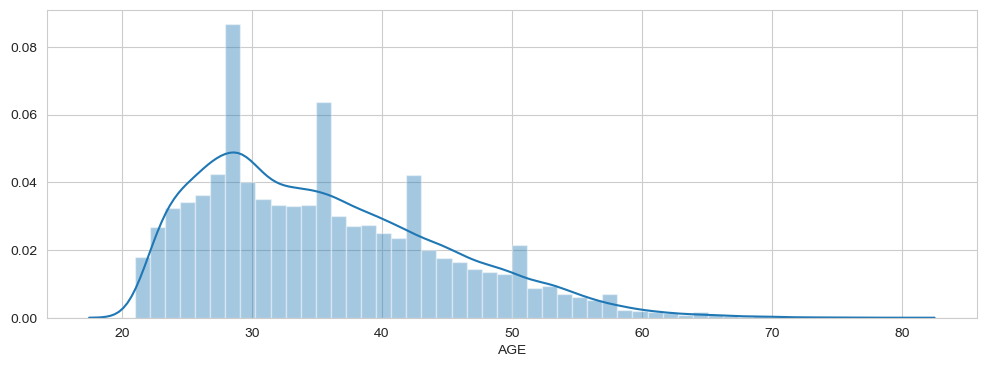

In [41]:
plt.figure(figsize=(12,4))

sns.distplot(creditt['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [42]:
creditt['AgeBin'] = pd.cut(creditt['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(creditt['AgeBin'].value_counts())

AgeBin
(25, 30]    7142
(40, 50]    6004
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: count, dtype: int64


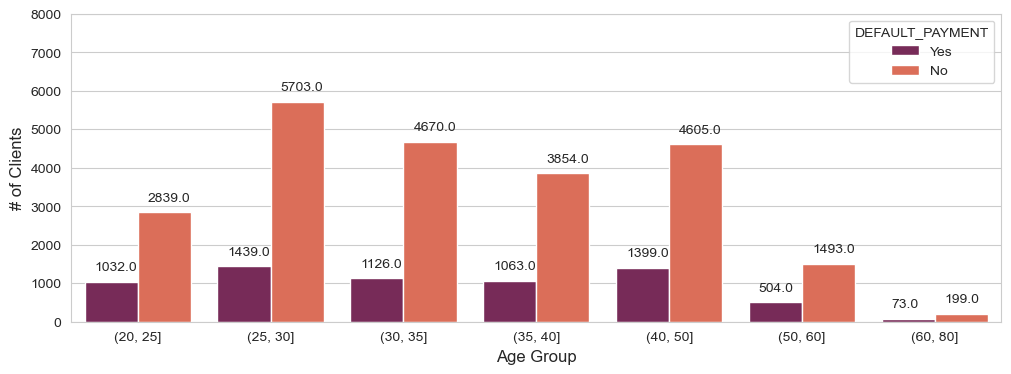

In [43]:
plt.figure(figsize=(12,4))

creditt['AgeBin'] = creditt['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = creditt, x = 'AgeBin', hue="DEFAULT_PAYMENT", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()



*   Most credit card holders in the dataset are between the age 25-30
*   Age group 60-80 form the minority group for credit card holder in the dataset



**DISTIBUTION AND ANALYSIS  OF CONTINUOS VARIABLE**

LIMIT_BAL

In [44]:
creditt['LimitBin'] = pd.cut(creditt['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
creditt['LimitBin'].value_counts()

LimitBin
(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3901
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: count, dtype: int64

In [45]:
import pandas as pd

# Sample data
data = {
    'LimitBin': [
        '(5000, 50000]', '(200000, 300000]', '(50000, 100000]',
        '(150000, 200000]', '(100000, 150000]', '(300000, 400000]',
        '(400000, 500000]', '(500000, 1100000]'
    ],
    'Count': [7675, 5059, 4822, 3978, 3902, 2759, 1598, 206]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate total count
total_count = df['Count'].sum()

# Calculate percentage for each bin
df['Percentage'] = (df['Count'] / total_count) * 100

# Display the DataFrame with percentages
df

,LimitBin,Count,Percentage
0,"(5000, 50000]",7675,25.584186
1,"(200000, 300000]",5059,16.863895
2,"(50000, 100000]",4822,16.073869
3,"(150000, 200000]",3978,13.260442
4,"(100000, 150000]",3902,13.007100
5,"(300000, 400000]",2759,9.196973
6,"(400000, 500000]",1598,5.326844
7,"(500000, 1100000]",206,0.686690




*  25.58% of the customer population has falls within the category of the lowest credit limit - 5000 - 50000
*   0.68% of the customers population  falls within category of the highest credit limit - 500000 - 1100000



 credit limit grouped by DEFAULT_PAYMENT

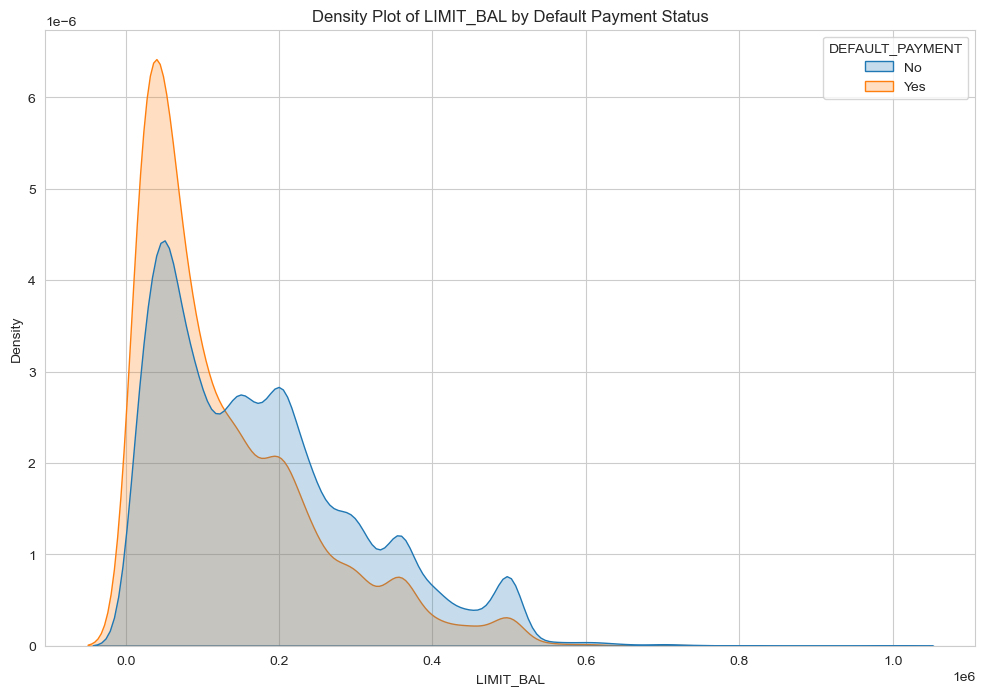

In [46]:
creditt['DEFAULT_PAYMENT'] = creditt['DEFAULT_PAYMENT'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

# Create a density plot using Seaborn with hue
sns.kdeplot(data=creditt, x='LIMIT_BAL', hue='DEFAULT_PAYMENT', fill=True, common_norm=False)

# Add labels to the legend
#handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend(handles=handles, labels=[f'DEFAULT_PAYMENT= {label}' for label in labels], title='Default Payment Status')


plt.title('Density Plot of LIMIT_BAL by Default Payment Status')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Density')
plt.grid(True)
plt.show()

.

*  Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults)

*   Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.


 **Analysis of LIMIT_BAL + Demographic Features**

In [47]:
creditt.groupby('SEX')['LIMIT_BAL'].mean()

SEX
Female    170086.462014
Male      163521.803651
Name: LIMIT_BAL, dtype: float64

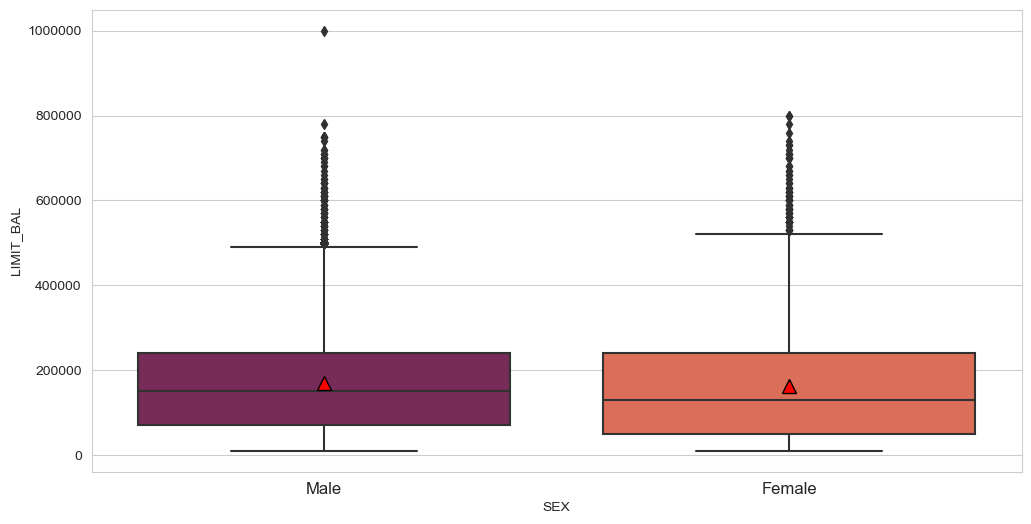

In [48]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = creditt, palette = 'rocket', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [49]:
creditt.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
Graduate School    212956.069910
High School        126550.270490
Others             181316.239316
University         147062.941051
Name: LIMIT_BAL, dtype: float64

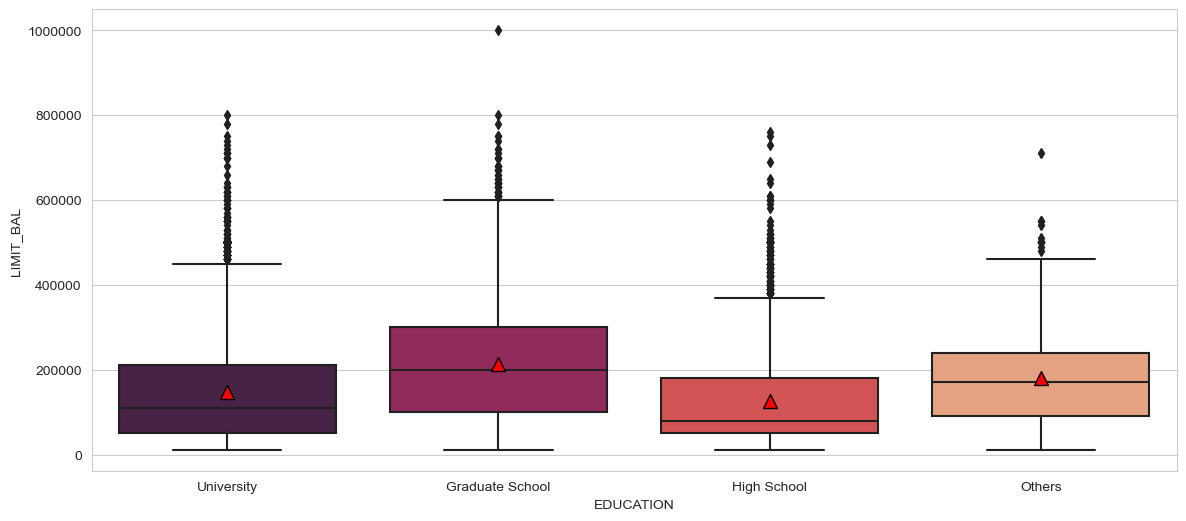

In [50]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = creditt, palette = 'rocket', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.show()

In [51]:
creditt.groupby('MARRIAGE')['LIMIT_BAL'].mean()

MARRIAGE
Married    182203.983014
Others     103076.923077
Single     156413.660737
Name: LIMIT_BAL, dtype: float64



*   Married customers have the highest credit limit



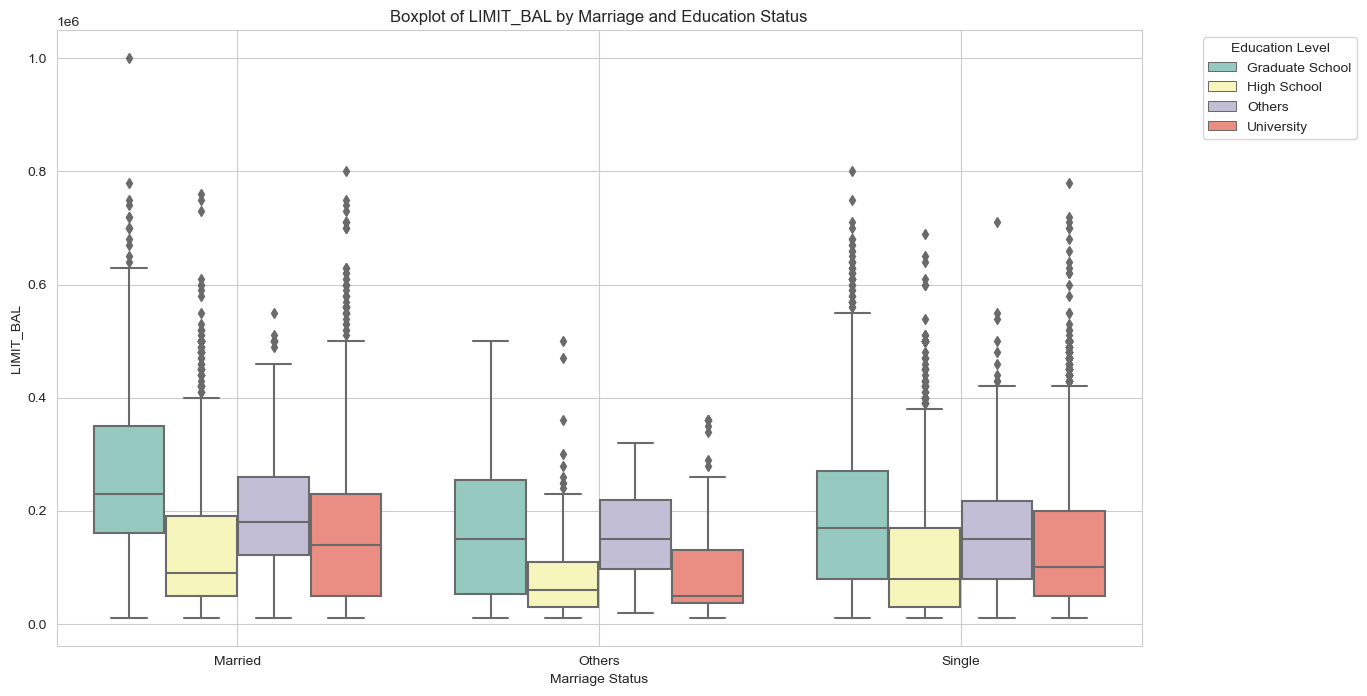

In [52]:
creditt['MARRIAGE'] = creditt['MARRIAGE'].astype('category')
creditt['EDUCATION'] = creditt['EDUCATION'].astype('category')

# Plotting
plt.figure(figsize=(14, 8))

# Create a boxplot using Seaborn
sns.boxplot(data=creditt, x='MARRIAGE', y='LIMIT_BAL', hue='EDUCATION', palette='Set3')

# Add labels and title
plt.title('Boxplot of LIMIT_BAL by Marriage and Education Status')
plt.xlabel('Marriage Status')
plt.ylabel('LIMIT_BAL')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The graph shows that


*   customers who are in high school but are neither married or single have the lowest limit_bal in the dataset  




**Analysis of LIMIT_BAL + Discrete variable-age+demographics**

In [53]:
creditt.groupby('AgeBin')['LIMIT_BAL'].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179686.822119
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

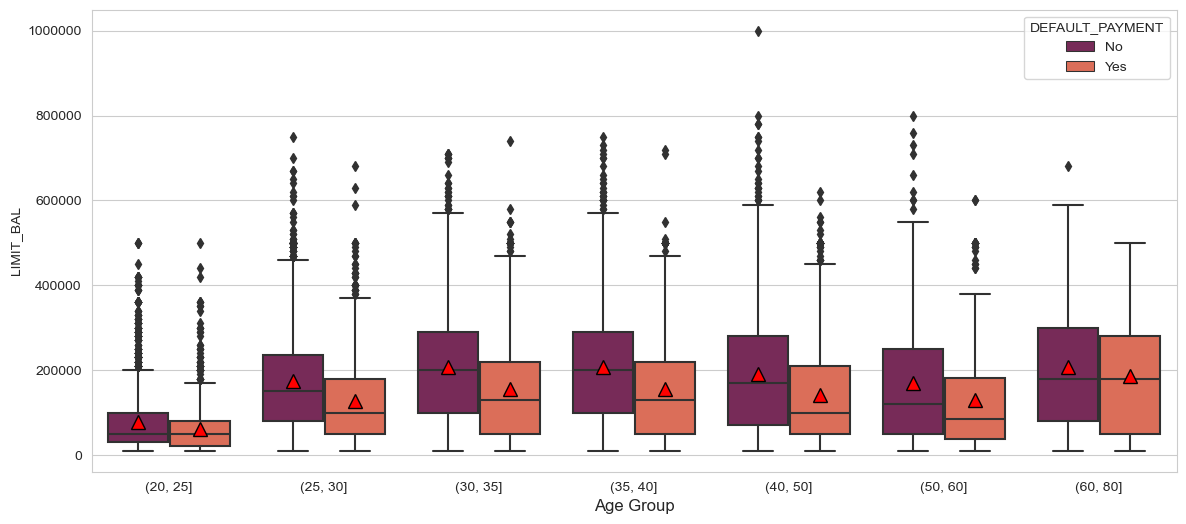

In [54]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",hue='DEFAULT_PAYMENT', data = creditt, palette = 'rocket', order = AgeBin_order, showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xlabel("Age Group", fontsize= 12)

plt.show()

In [55]:
creditt.groupby(by=['AgeBin', 'SEX'])['DEFAULT_PAYMENT'].value_counts(normalize = True)

AgeBin    SEX     DEFAULT_PAYMENT
(20, 25]  Female  No                 0.744642
                  Yes                0.255358
          Male    No                 0.707296
                  Yes                0.292704
(25, 30]  Female  No                 0.805823
                  Yes                0.194177
          Male    No                 0.786328
                  Yes                0.213672
(30, 35]  Female  No                 0.821336
                  Yes                0.178664
          Male    No                 0.782157
                  Yes                0.217843
(35, 40]  Female  No                 0.806846
                  Yes                0.193154
          Male    No                 0.751704
                  Yes                0.248296
(40, 50]  Female  No                 0.780281
                  Yes                0.219719
          Male    No                 0.749420
                  Yes                0.250580
(50, 60]  Female  No                 0.768571


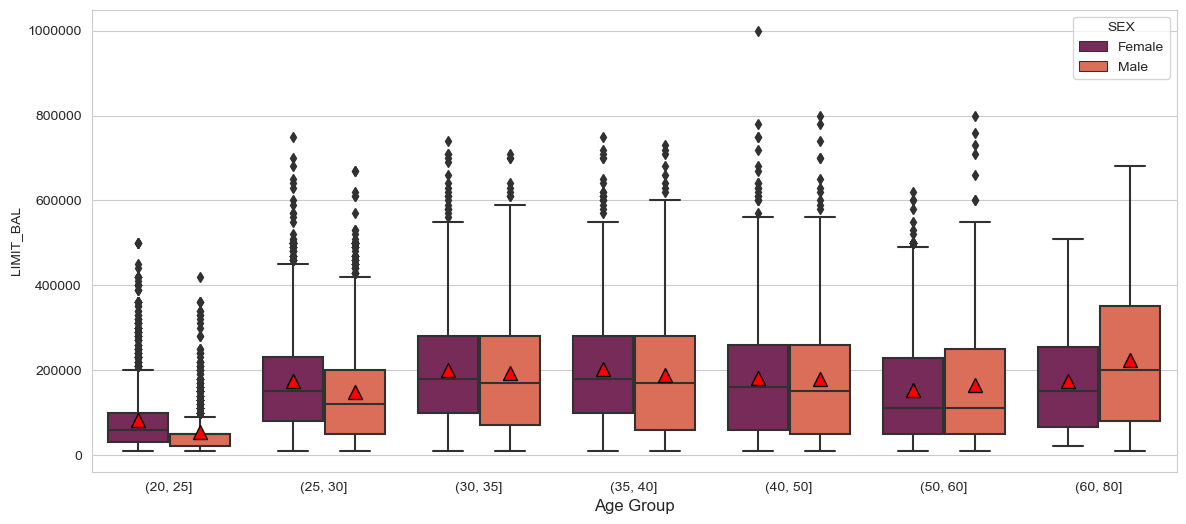

In [56]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",hue='SEX', data = creditt, palette = 'rocket', order = AgeBin_order, showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation
plt.xlabel("Age Group", fontsize= 12)

plt.show()




*   Males within Age group 60-80 has the highest credit limit::


*   Females credit card users makes up approximately 70% of the customers within age group 20-25







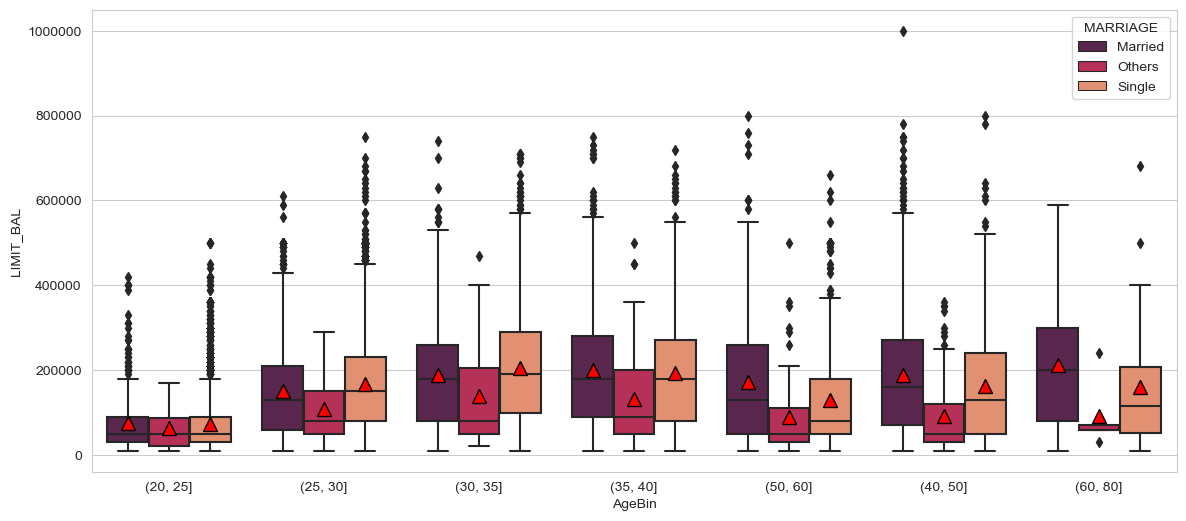

In [57]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'MARRIAGE', data = creditt, palette = 'rocket', showmeans=True,
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation)

plt.show()



*    Customers in the age group 60 -65 are either single or married. there is no credit limit or record of others- divorced or widowed customer with a credit card.



in general:


*   Male custoers who are between the age group 20 - 25 single as well as has high school as their education level have the highest percentage of defaulting on their credit card
  

*   customers between the age- group of 60 - 80 who are neither married or single and have high school  educational level have no credit card



*   Married females within the age group 30 -35 whose educational level is fradute school have the highest percentage of not defaulting on their credit card







**Analysis of LIMIT_BAL + payments , Bills**

***Repayment- Pay_AMT1 - Pay_Amt6***

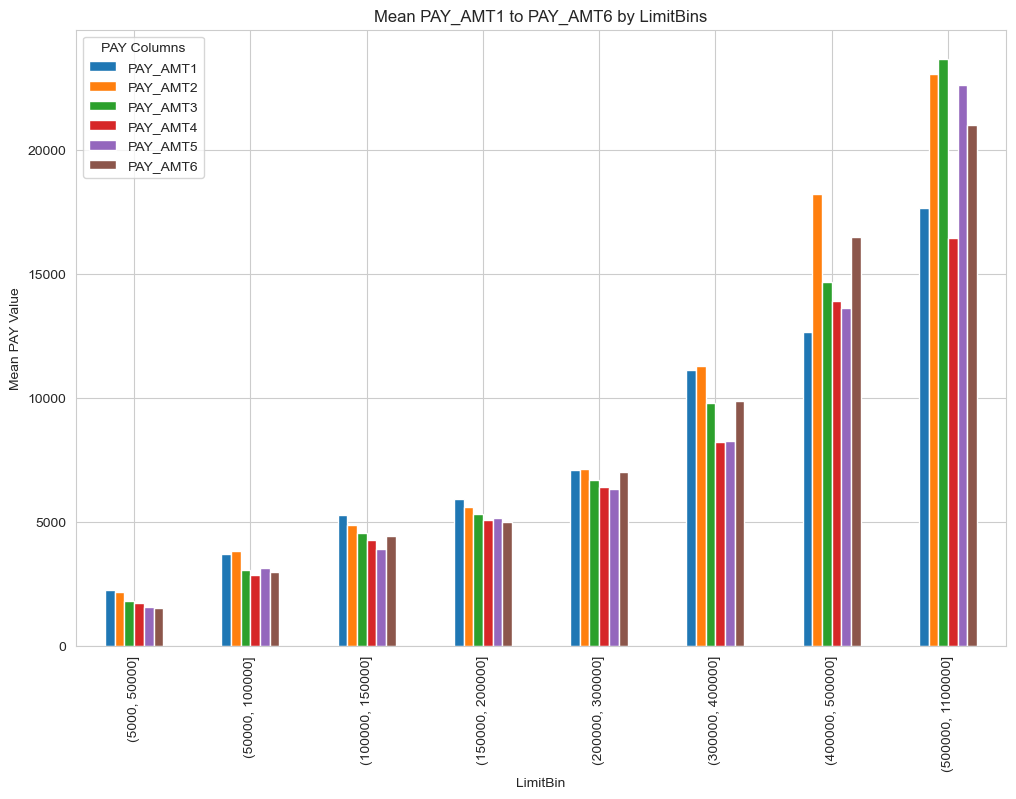

In [58]:
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay_means = creditt.groupby('LimitBin')[pay_columns].mean()

# Plotting
pay_means.plot(kind='bar', figsize=(12, 8))
plt.title('Mean PAY_AMT1 to PAY_AMT6 by LimitBins')
plt.xlabel('LimitBin')
plt.ylabel('Mean PAY Value')
plt.legend(title='PAY Columns')
plt.show()



*   average Payment of approximately more than £24000 for customers with credit limit (500,000 - 1100000) received in july 2005 was the highest payment received with the six month period of april 2005 to september 2005.
* the average lowest payment of approximately more than £1300 for customers with credit limit (5000 - 50000)  received in April 2005 was the lowest payment received with the six month period of april 2005 to september 2005.



**Monthly payment status**

In [59]:
creditt_melted = creditt.melt(id_vars='DEFAULT_PAYMENT', value_vars=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
                    var_name='Payment', value_name='Value')

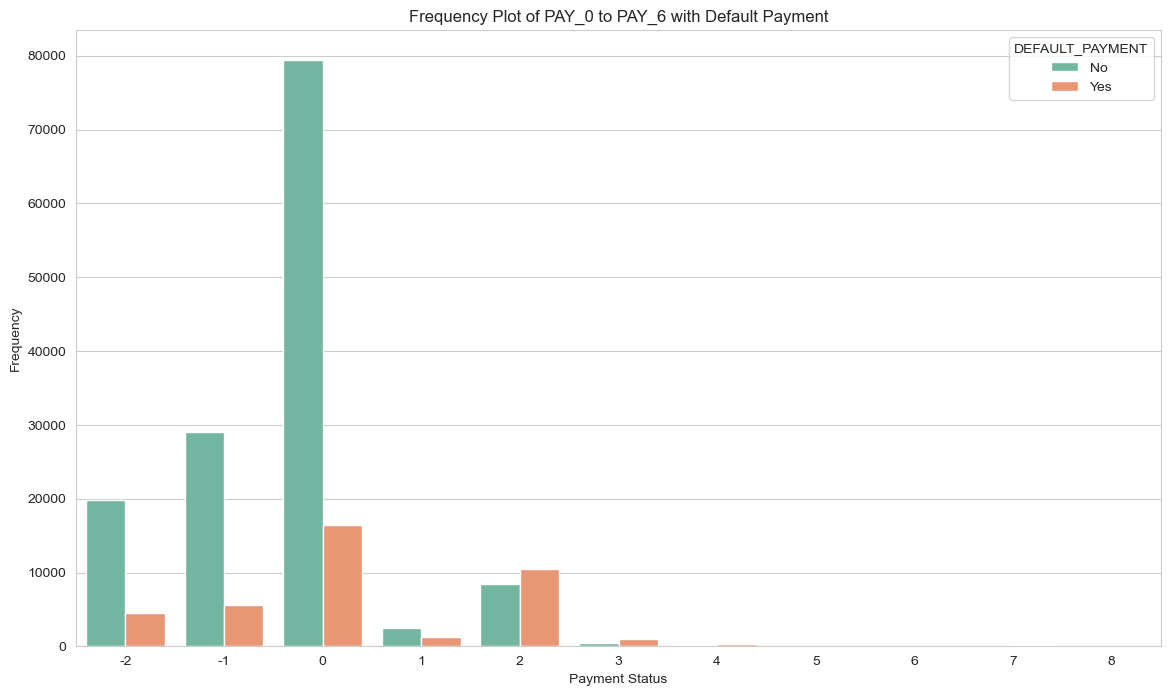

In [60]:
plt.figure(figsize=(14, 8))  # Set the size of the plot
sns.countplot(data=creditt_melted, x='Value', hue='DEFAULT_PAYMENT', palette='Set2')
plt.title('Frequency Plot of PAY_0 to PAY_6 with Default Payment')
plt.xlabel('Payment Status')
plt.ylabel('Frequency')
plt.show()



*  The graph shows that customers who pay on time or early are much less likely to default
*   Customers who are late by even a month or two have a higher risk of defaulting.

indicating that there is a strong correlation between the payment timeline and default risk


Bill Amount

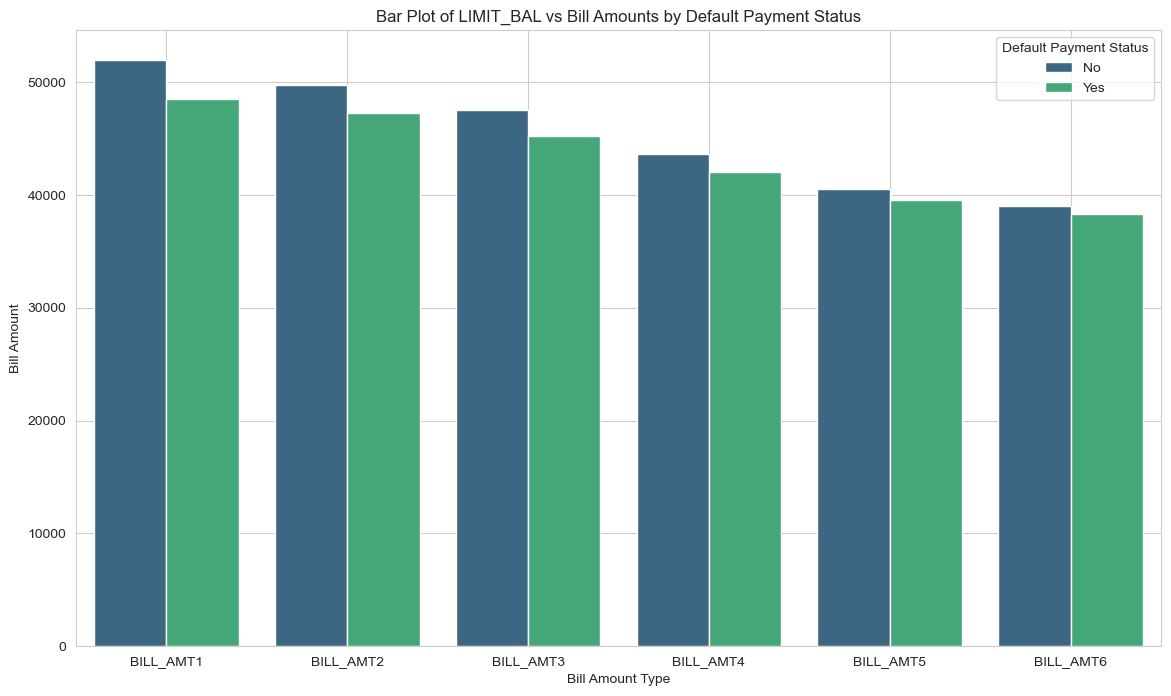

In [61]:
creditt_long = pd.melt(creditt, id_vars=['LIMIT_BAL', 'DEFAULT_PAYMENT'],
                  value_vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                  var_name='Bill_Type', value_name='Bill_Amount')

# Plotting
plt.figure(figsize=(14, 8))

# Create a bar plot using Seaborn with hue
sns.barplot(data=creditt_long, x='Bill_Type', y='Bill_Amount', hue='DEFAULT_PAYMENT', ci=None, palette='viridis')

# Add labels and title
plt.title('Bar Plot of LIMIT_BAL vs Bill Amounts by Default Payment Status')
plt.xlabel('Bill Amount Type')
plt.ylabel('Bill Amount')
plt.legend(title='Default Payment Status')
plt.grid(True)
plt.show()

Bills in september 2005 was the highest between April 2005 to September 2005 with steady increase in the rate of  default as well as non-default from April 2005 to September 2005

CHECK MULTICOLINEARITY

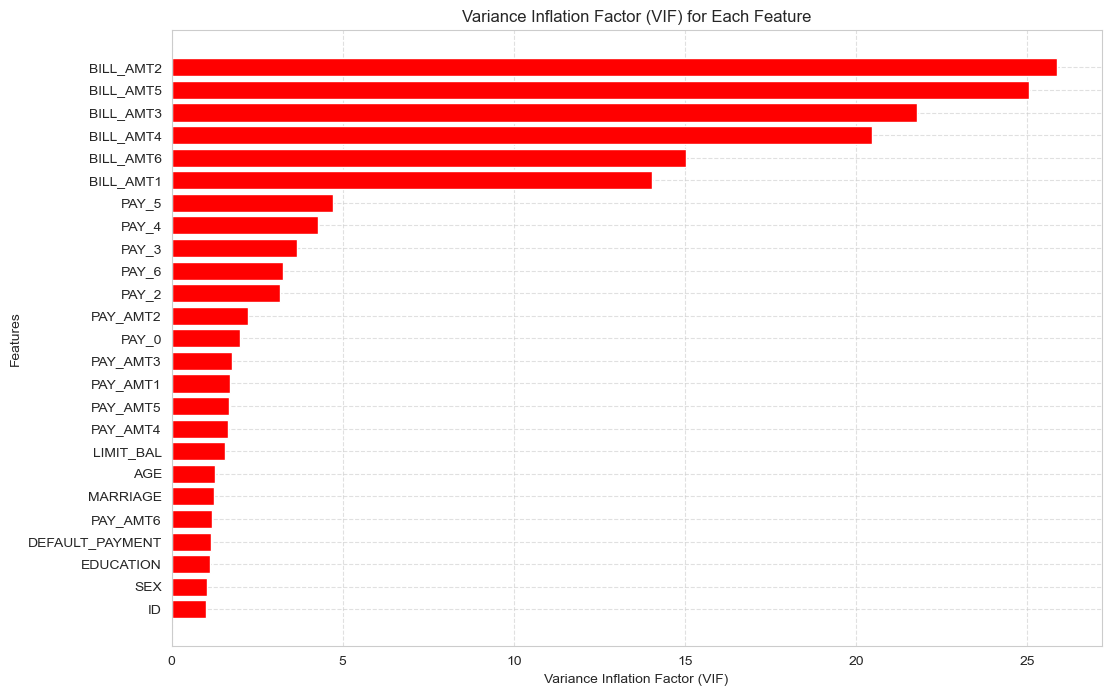

In [63]:
# Data: Features and their corresponding VIF values
data = {
    'Feature': ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
                'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_PAYMENT'],
    'VIF': [1.014594, 1.559687, 1.024603, 1.128696, 1.231613, 1.276242, 1.997889, 3.177986,
            3.660189, 4.293119, 4.729305, 3.256204, 14.046672, 25.874386, 21.776035,
            20.452669, 25.063842, 15.025918, 1.708871, 2.237962, 1.757209, 1.650888,
            1.688307, 1.170091, 1.141575]
}

# Create a DataFrame
vif_df = pd.DataFrame(data)

# Sort by VIF values for better visualization
vif_df = vif_df.sort_values(by='VIF', ascending=False)

# Plotting the VIF values
plt.figure(figsize=(12, 8))
plt.barh(vif_df['Feature'], vif_df['VIF'], color='red')
plt.xlabel('Variance Inflation Factor (VIF)')
plt.ylabel('Features')
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest VIF on top
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

it can be seen that BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 have high colinr=ear values and as such will be dropped from the dataset.

In [64]:
creditt.drop(columns=['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], inplace=True)

In [65]:
creditt.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT', 'AgeBin', 'LimitBin'],
      dtype='object')

above are the features selected and not dropped

CORRELATION

In [69]:
#corr_matrix = creditt.corr()

# Plot a heatmap of the correlation matrix
#plt.figure(figsize=(15, 10))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix Heatmap')
#plt.show()

The correlation matrix shows that there is little to no correlation between different features. with the highest correlation value between two different features at the range of 0.2 - 0.4

HANDLING OUTLIERS using IQR and .reset_index()

In [70]:
continuous_cols =['BILL_AMT1','BILL_AMT6']

In [71]:
Q1 = creditt[continuous_cols].quantile(0.25)
Q3 = creditt[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((creditt[continuous_cols] < (Q1 - 1.5 * IQR)) | (creditt[continuous_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

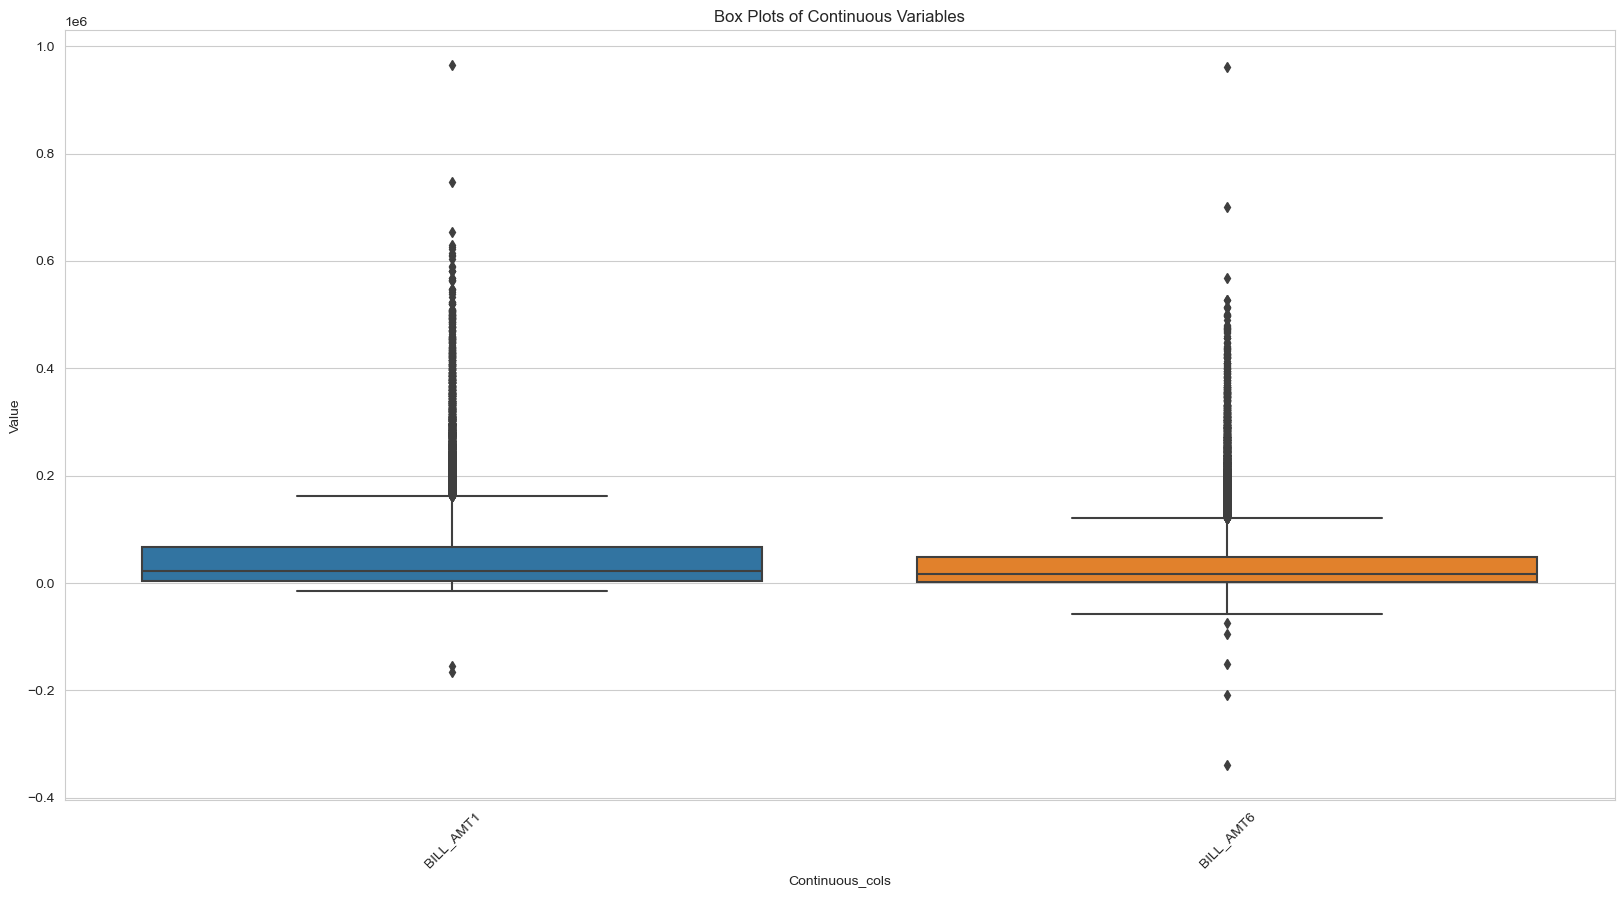

In [72]:

sns.boxplot(data=creditt[continuous_cols])

plt.title('Box Plots of Continuous Variables')
plt.xlabel('Continuous_cols')
plt.ylabel('Value')

plt.xticks(rotation=45)
plt.show()

In [73]:
# Remove outliers
creditt1 = creditt[~outliers].reset_index(drop=True)

In [74]:
creditt1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT,AgeBin,LimitBin
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,Yes,"(20, 25]","(5000, 50000]"
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,Yes,"(25, 30]","(100000, 150000]"
2,90000,Female,University,Single,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,No,"(30, 35]","(50000, 100000]"
3,50000,Female,University,Married,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,No,"(35, 40]","(5000, 50000]"
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,No,"(50, 60]","(5000, 50000]"


In [76]:
creditt1.shape

(26586, 22)

In [79]:
creditt1.to_csv('clean_creditt.csv', index=False)